In [2]:
import pandas as pd
df = pd.read_csv(r'E:\data set\task-17\Mall_Customers.csv')

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


K-Means Clustering and Visualization

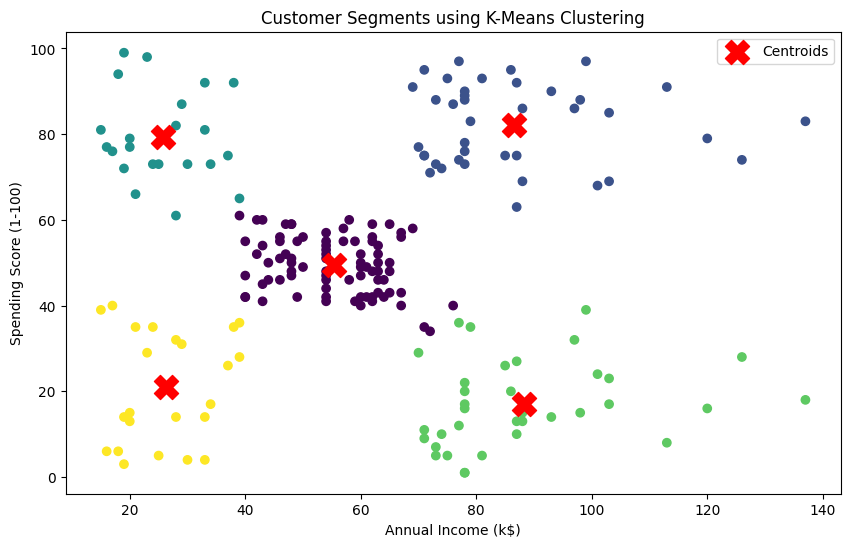

In [3]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Selecting features: Annual Income and Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Initial guess of 5 clusters
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segments using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


Optimal Number of Clusters: Elbow Method and Silhouette Score

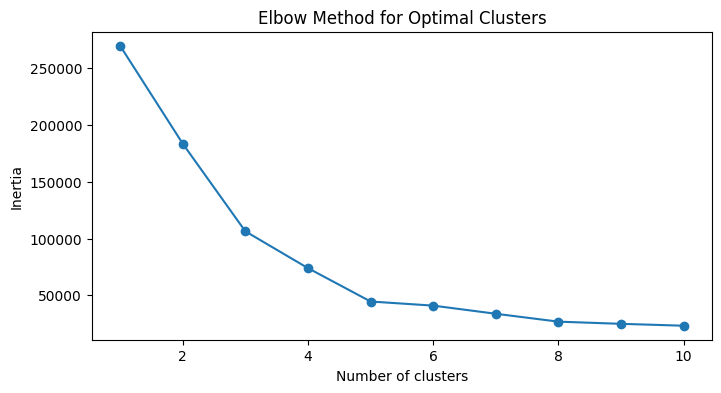

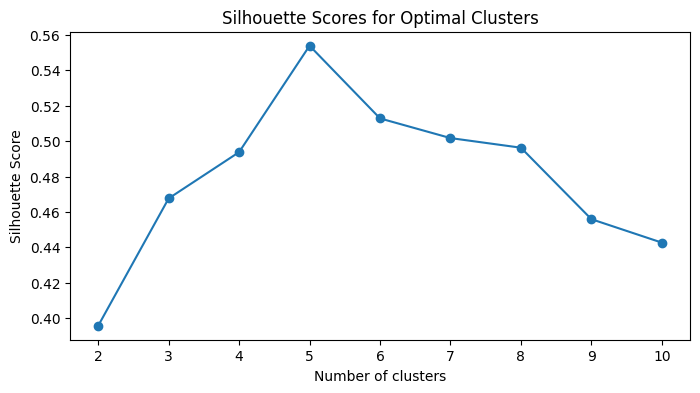

In [4]:
from sklearn.metrics import silhouette_score
import numpy as np

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


 Cluster Profiling and Insights

In [6]:
# Profile the clusters by calculating the mean of numeric columns only
cluster_profiles = df.groupby('Cluster').mean(numeric_only=True)

# Display the characteristics of each cluster
print("Cluster Profiles:\n", cluster_profiles)


# Additional insights could involve analyzing the distribution of age, income, and spending score within each cluster
for cluster in range(5):
    print(f"\nCluster {cluster} Profile")
    print(df[df['Cluster'] == cluster].describe())


Cluster Profiles:
          CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        162.000000  32.692308           86.538462               82.128205
2         23.090909  25.272727           25.727273               79.363636
3        164.371429  41.114286           88.200000               17.114286
4         23.000000  45.217391           26.304348               20.913043

Cluster 0 Profile
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   81.000000  81.000000           81.000000               81.000000   
mean    86.320988  42.716049           55.296296               49.518519   
std     24.240889  16.447822            8.988109                6.530909   
min     44.000000  18.000000           39.000000               34.000000   
25%     66.000000  27.000000           48.000000         

Hierarchical Clustering for Customer Segmentation

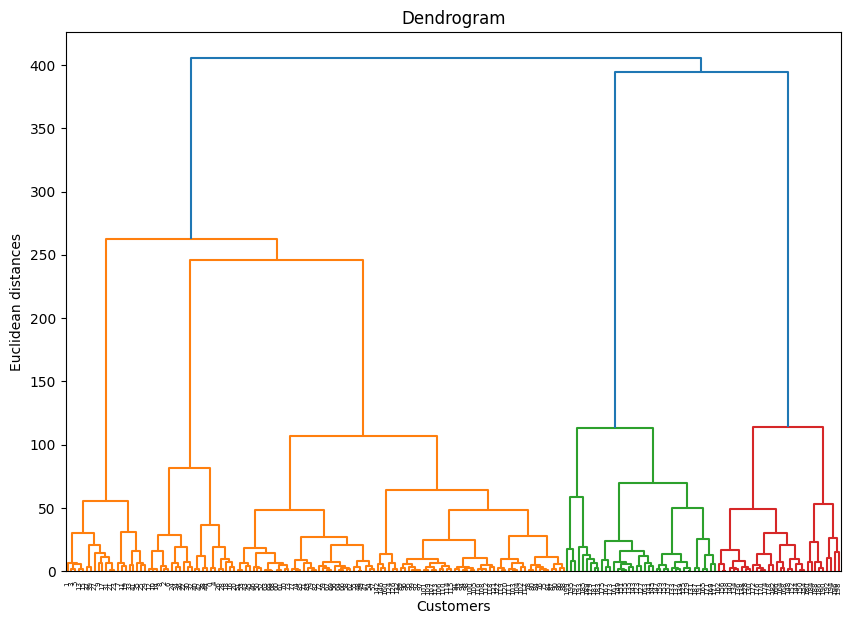

     Cluster  HC_Cluster
0          4           4
1          2           3
2          4           4
3          2           3
4          4           4
..       ...         ...
195        1           2
196        3           0
197        1           2
198        3           0
199        1           2

[200 rows x 2 columns]


In [10]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Visualize the dendrogram for hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Apply Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['HC_Cluster'] = hc.fit_predict(X)

# Compare K-Means and Hierarchical Clustering
print(df[['Cluster', 'HC_Cluster']])


Visualizing Clusters with PCA

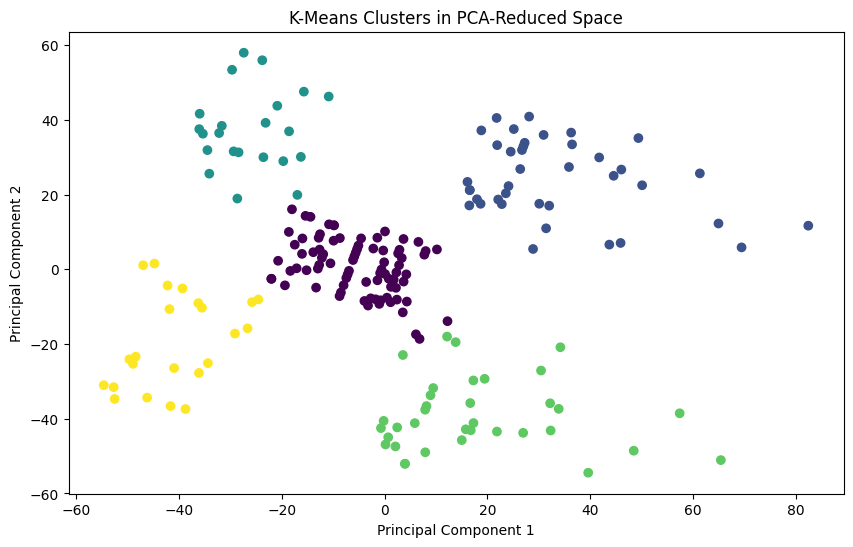

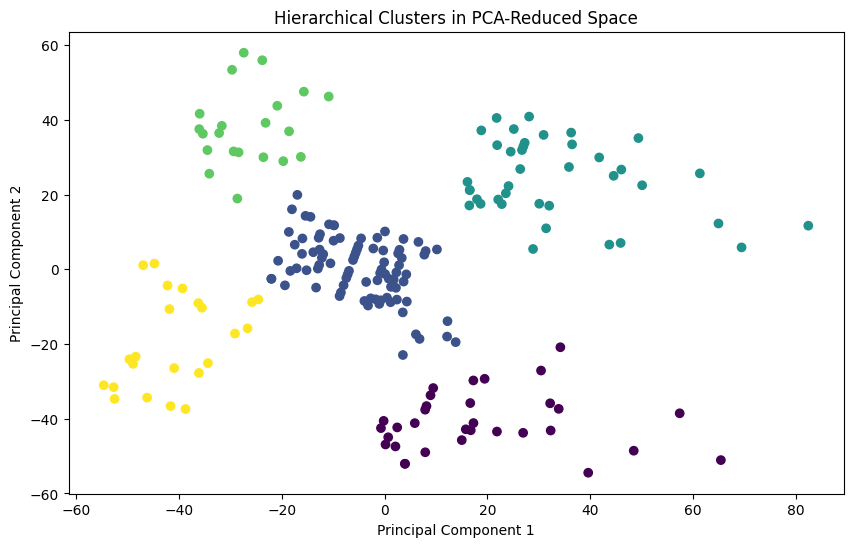

In [11]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize K-Means clusters in PCA-reduced space
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clusters in PCA-Reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Visualize Hierarchical Clustering in PCA-reduced space
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['HC_Cluster'], cmap='viridis')
plt.title('Hierarchical Clusters in PCA-Reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
